# Workbook 00 - Solving beams with `PyNite`

In [92]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

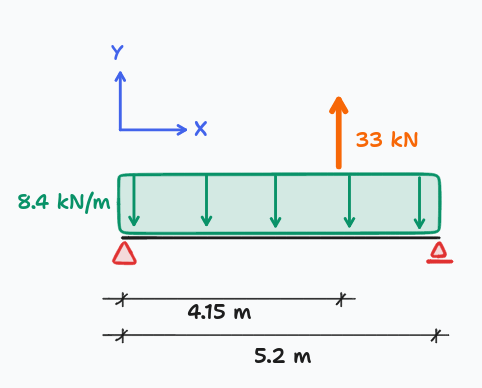

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

{'LC1': 30.576, 'LC2': 17.304807692307694, 'D+L': 15.176538461538454}
{'LC1': 30.576, 'LC2': -12.204807692307696, 'D+L': -4.496538461538451}


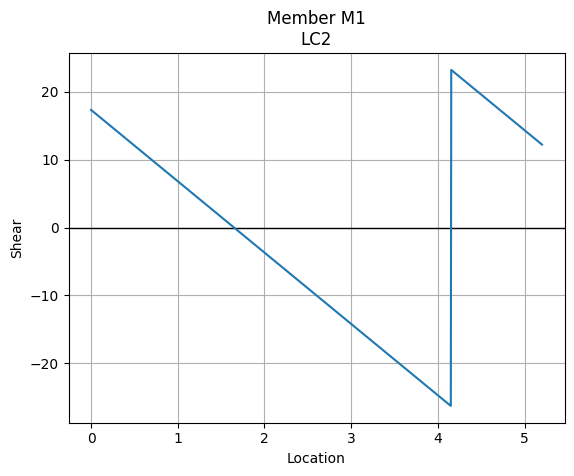

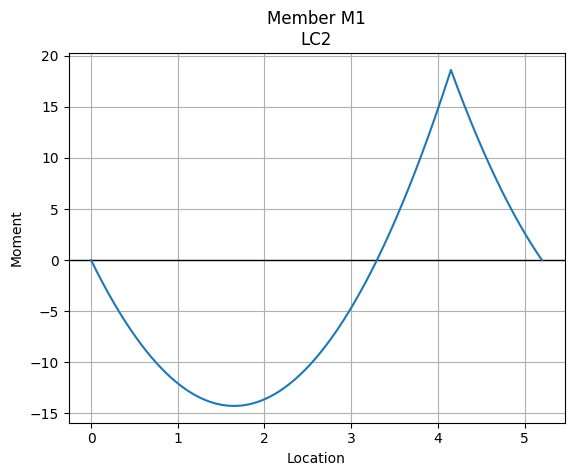

In [88]:
# This is me completing the workbook
beam_model_1 = FEModel3D() 
beam_model_1.add_node('N1',0,0,0)
beam_model_1.add_node('N2',5.2,0,0)

beam_model_1.add_member('M1','N1','N2',230e3,77e3,100e6,400e6,100e3,2000)

beam_model_1.def_support('N1',support_DX=True,support_DY=True,support_DZ=True,support_RX=False)
beam_model_1.def_support('N2',support_DY=True)

beam_model_1.add_load_combo('LC1',{'D':1.4},combo_type='strength')
beam_model_1.add_load_combo('LC2', {'D':1.25, 'L':1.5}, combo_type='strength')
beam_model_1.add_load_combo('D+L', {'D':1.0, 'L':1.0}, combo_type='strength')

beam_model_1.add_member_dist_load('M1','Fy',-8.4,-8.4,x1=0,x2=5.2,case='D')
beam_model_1.add_member_pt_load('M1','Fy',33,4.15,case='L')
render_model(beam_model_1,annotation_size=0.1,deformed_shape=False,deformed_scale=50,
    render_loads=True,
    color_map=None,
    scalar_bar=True,
    combo_name='D+L',
    case=None,
    labels=True,
    screenshot=None
)
beam_model_1.analyze(log=False,check_stability=False,check_statics=False,max_iter=30,sparse=False)

print(beam_model_1.Nodes['N1'].RxnFY)
print(beam_model_1.Nodes['N2'].RxnFY)
beam_model_1.Members['M1'].plot_shear('Fy',combo_name='LC2', n_points=1000)
beam_model_1.Members['M1'].plot_moment('Mz',combo_name='LC2', n_points=10000)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

{'LC1': 21337.343999999994, 'LC2': 19637.700000000004, 'D+L': 15631.96}
{'LC1': 0.0, 'LC2': 0.0, 'D+L': 0.0}


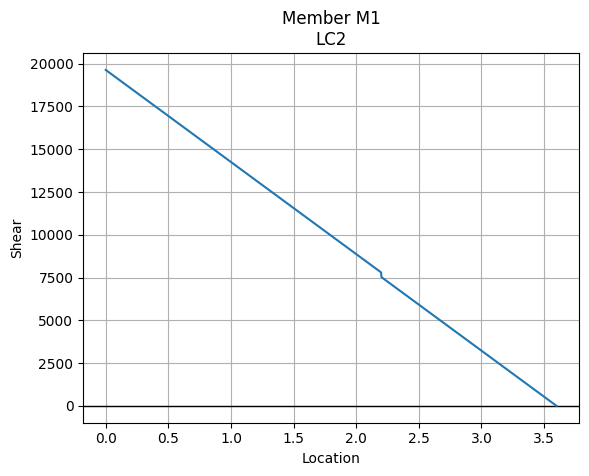

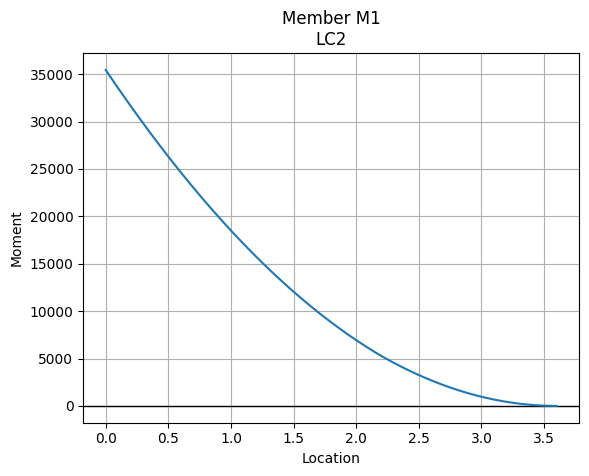

In [104]:
beam_model_1 = FEModel3D() 
beam_model_1.add_node('N1',0,0,0)
beam_model_1.add_node('N2',3.6,0,0)

f_c=45
density_concrete=2400 #kg/m3

E_c=30951.23229
beam_width=300
beam_depth=600
Iz=5400e6
Iy=1350e6
J=5566.192595e6
self_wt=density_concrete*9.8*beam_width/1000*beam_depth/1000

beam_model_1.add_member('M1','N1','N2',E_c,77e3,Iy,Iz,100e3,2000)

beam_model_1.def_support('N1',support_DX=True,support_DY=True,support_DZ=True,support_RX=True,
                          support_RY=True,support_RZ=True)

beam_model_1.add_load_combo('LC1',{'D':1.4},combo_type='strength')
beam_model_1.add_load_combo('LC2', {'D':1.25, 'L':1.5}, combo_type='strength')
beam_model_1.add_load_combo('D+L', {'D':1.0, 'L':1.0}, combo_type='strength')

beam_model_1.add_member_dist_load('M1','Fy',-self_wt,-self_wt,case='D')
beam_model_1.add_member_dist_load('M1','Fy',-60,-60,case='L')
beam_model_1.add_member_pt_load('M1','Fy',-175,2.2,case='L')

render_model(beam_model_1,annotation_size=0.1,deformed_shape=False,deformed_scale=50,
    render_loads=True,
    color_map=None,
    scalar_bar=True,
    combo_name='D+L',
    case=None,
    labels=True,
    screenshot=None
)
beam_model_1.analyze(log=False,check_stability=False,check_statics=False,max_iter=30,sparse=False)

print(beam_model_1.Nodes['N1'].RxnFY)
print(beam_model_1.Nodes['N2'].RxnFY)
beam_model_1.Members['M1'].plot_shear('Fy',combo_name='LC2', n_points=1000)
beam_model_1.Members['M1'].plot_moment('Mz',combo_name='LC2', n_points=10000)

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

{'LC1': 3.5902222222222226, 'LC2': 7.464814814814818, 'D+L': 5.403950617283949}
{'LC1': 5.861333333333333, 'LC2': 9.955555555555557, 'D+L': 7.334814814814816}
{'LC1': -0.3795555555555554, 'LC2': -1.8203703703703709, 'D+L': -1.2587654320987656}


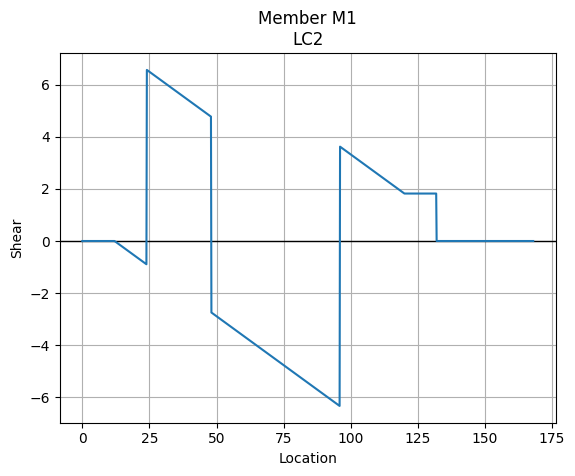

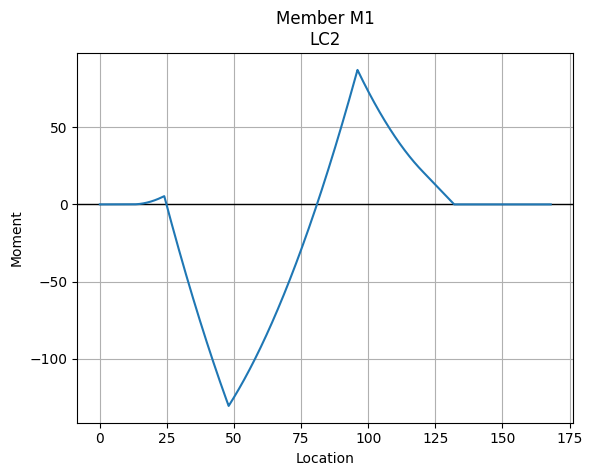

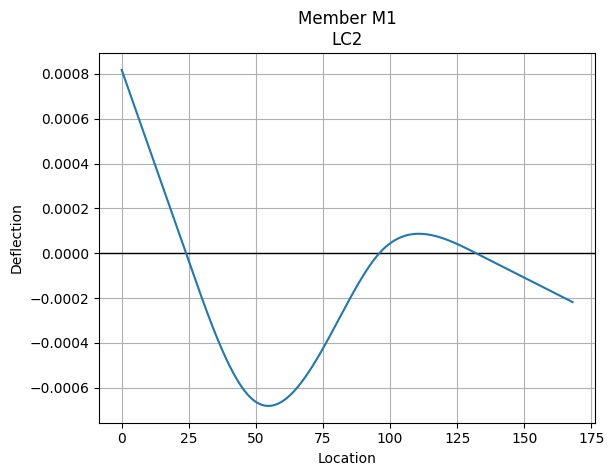

In [115]:
beam_model_3 = FEModel3D() 
beam_model_3.add_node('N1',0,0,0)
beam_model_3.add_node('N2',168,0,0)

beam_model_3.add_node('N3',24,0,0)
beam_model_3.add_node('N4',96,0,0)
beam_model_3.add_node('N5',132,0,0)

E_c=58e3
Iz=1200
beam_model_3.add_member('M1','N1','N2',E_c,77e3,100e6,Iz,100e3,2000)

beam_model_3.def_support('N3',support_DX=True,support_DY=True,support_DZ=True,support_RX=False,
                          support_RY=False,support_RZ=False)
beam_model_3.def_support('N4',support_DX=True,support_DY=True,support_DZ=True,support_RX=False,
                          support_RY=False,support_RZ=False)
beam_model_3.def_support('N5',support_DX=True,support_DY=True,support_DZ=True,support_RX=False,
                          support_RY=False,support_RZ=False)

beam_model_3.add_load_combo('LC1',{'D':1.4},combo_type='strength')
beam_model_3.add_load_combo('LC2', {'D':1.25, 'L':1.5}, combo_type='strength')
beam_model_3.add_load_combo('D+L', {'D':1.0, 'L':1.0}, combo_type='strength')

#beam_model_3.add_member_dist_load('M1','Fy',-self_wt,-self_wt,case='D')
beam_model_3.add_member_dist_load('M1','Fy',-0.060,-0.060,12,120,case='D')
beam_model_3.add_member_pt_load('M1','Fy',-5,48,case='L')

render_model(beam_model_3,annotation_size=5,deformed_shape=False,deformed_scale=50,
    render_loads=True,
    color_map=None,
    scalar_bar=True,
    combo_name='D+L',
    case=None,
    labels=True,
    screenshot=None
)
beam_model_3.analyze(log=False,check_stability=False,check_statics=False,max_iter=30,sparse=False)

print(beam_model_3.Nodes['N3'].RxnFY)
print(beam_model_3.Nodes['N4'].RxnFY)
print(beam_model_3.Nodes['N5'].RxnFY)
beam_model_3.Members['M1'].plot_shear('Fy',combo_name='LC2', n_points=1000)
beam_model_3.Members['M1'].plot_moment('Mz',combo_name='LC2', n_points=10000)
beam_model_3.Members['M1'].plot_deflection('dy',combo_name='LC2', n_points=10000)


# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.